In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df=pd.read_csv('data/Titanic/train.csv')


### Data description
- Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- Sibsp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Common functionalities for exploration a dataset

### Getting to know the shape and basic information

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


returns the number of rows and columns of a dataset

In [6]:

train_df.shape

(891, 12)

returns the column names

In [8]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

select one column to inspect

In [98]:
train_df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

Getting to know the data type of each column

In [11]:
## object typically means string data type
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Get basic stats of numeric columns

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Alternatively, you can calculate them manually

In [34]:
train_df['Age'].mean()

29.69911764705882

In [22]:
## Another handy function
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


For string datatypes, we are interested in their cardinality (number of unique values)

In [14]:

train_df['Sex'].unique() 
#train_df['Ticket'].unique() 
#train_df['Cabin'].unique()
#train_df['Embarked'].unique()

array(['male', 'female'], dtype=object)

In [30]:

print(len(train_df['Sex'].unique()))
print(len(train_df['Ticket'].unique()))

2
681


We can also quickly know the counts for each cardinality


In [15]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
## you can use the same function on numeric columns
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Get the number of null values of each column

In [24]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Treating missing values
How you treat missing values really depend on your knowledge of your data and your use case. Typically options are:
- Remove the rows with missing values
- Remove the columns with too many missing values
- Fill the missing value with a value (0 or mean)

Since more than 3/4 of data is missing Cabin information, we will remove it from the data
axis=1 here means it's dropping a column, as opposed to dropping a row

In [31]:
train_df=train_df.drop(['Cabin'],axis=1)

In [33]:
train_df.shape

(891, 11)

Another way to utilize this null information, is to create a new variable to indicate whether the column is null or not.

In [97]:
## train_df['is_cabin_missing'] = train_df['Cabin'].isnull().astype(int)

In [35]:
## Next we can fill the missing age using the mean age 
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)

In [38]:
train_df['Age'].isna().sum()

0

Replacing NA values with mean is probably not a good idea if your data is skewed, or have multiple modes.

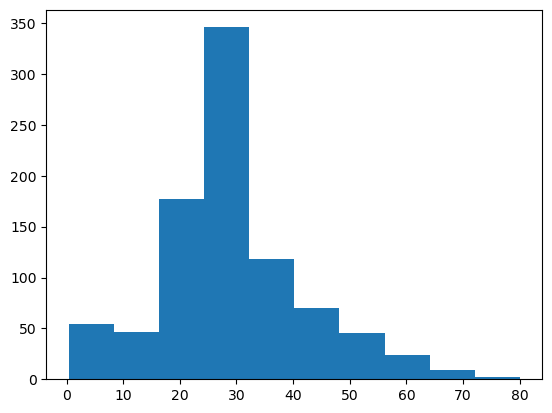

In [41]:
plt.hist(train_df['Age'])
plt.show()

In [43]:
## Only 2 rows miss the information of Embarked. Let's remove those two rows
train_df = train_df.dropna()

In [44]:
train_df.shape

(889, 11)

### Remove columns that have shouldn't have any predictive power, such as IDs, names

In [46]:
train_df=train_df.drop(['Name', 'PassengerId'],axis=1)


In [47]:
train_df.shape

(889, 9)

### Inspect whether the data contains outliers

For numerical values, this typically involves plotting the histogram to see their distribution

In [60]:
numericals

['Age', 'Fare']

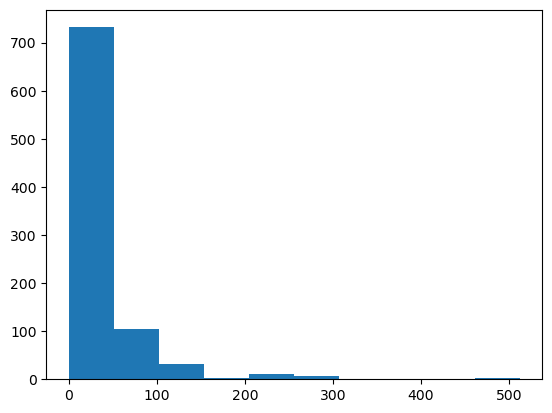

In [62]:
plt.hist(train_df['Fare'])
plt.show()

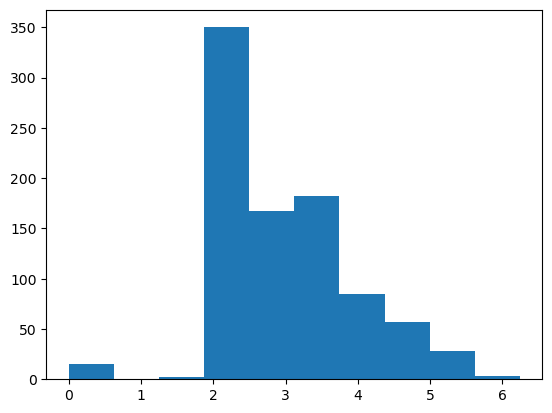

In [71]:
## Typically skewed data can be transformed into normally shaped data by taking the log transform
## we first add 1 to make sure there is no log(0)
plt.hist(np.log(train_df['Fare'] + 1))
plt.show()

For categorical data, this typically involves checking whether the classes are balanced

In [72]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [74]:
## looks like the Ticket column has cardinality too high, it is unlikely to offer much insight when building a model
train_df=train_df.drop(['Ticket'],axis=1)


## Visualizing data to see potential insights

In [77]:
0.3 * 0.3 + 0.7 * 0.7

0.58

## Feature engineering

Feature engineering is the process of transforming raw data into features that can be used to train a machine learning model. This can include tasks such as scaling, normalization, dimensionality reduction, and feature selection. The goal of feature engineering is to create a set of informative and relevant features that capture the underlying patterns in the data and improve the performance of the model. It is considered an important step in the machine learning pipeline and often requires domain knowledge and experimentation to achieve optimal results.

### Turn binary string variables to numerics

In [83]:
gender_map = {'male': 0, 'female': 1}
train_df['Sex_numeric'] = train_df['Sex'].apply(lambda row: gender_map[row])


In [89]:
train_df = train_df.drop(['Sex'], axis=1)

For the column Embarked, there are three values: 'S', 'C', 'Q', we do not know of their meaning or order. For variable like this, we can apply one-hot encoding technique.

### One-hot encoding categorical variables

One-hot encoding is a process to convert categorical data into numerical data. The technique creates a new binary column for each unique category in the data, with a value of 1 indicating that the observation belongs to that category and a value of 0 indicating that it does not.

For example, if a variable has three possible categories (A, B, C), three new binary columns would be created, one for each category. An observation that belongs to category A would have a value of 1 in the column for category A and 0 in the columns for categories B and C.

In [90]:
train_df = pd.get_dummies(train_df, columns=['Embarked'])

In [91]:
train_df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_numeric,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,0,0,1
1,1,1,38.000000,1,0,71.2833,1,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,1
4,0,3,35.000000,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,0,0


### Other feature engineering you can perform on this dataset

Feature engineering is highly subjective and you can have lots of creativity. In addition to standard steps like above, you can include additional steps like binning a column: for example, create a new variable to tell whether Parch is greater than 0; and like mentioned above, we can log transform Fare to make it follow a normal distribution. These steps are especially important if you have enough domain knowledge. 

Quiz: create two more variables as mentioned above using what we have learnt today

### Save a copy of the processed data for training later

In [93]:
train_df.to_csv("data/Titanic/train_processed.csv", index=False)